In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pima_df = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
pima_df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
pima_df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


/Users/vverdhan/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/vverdhan/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


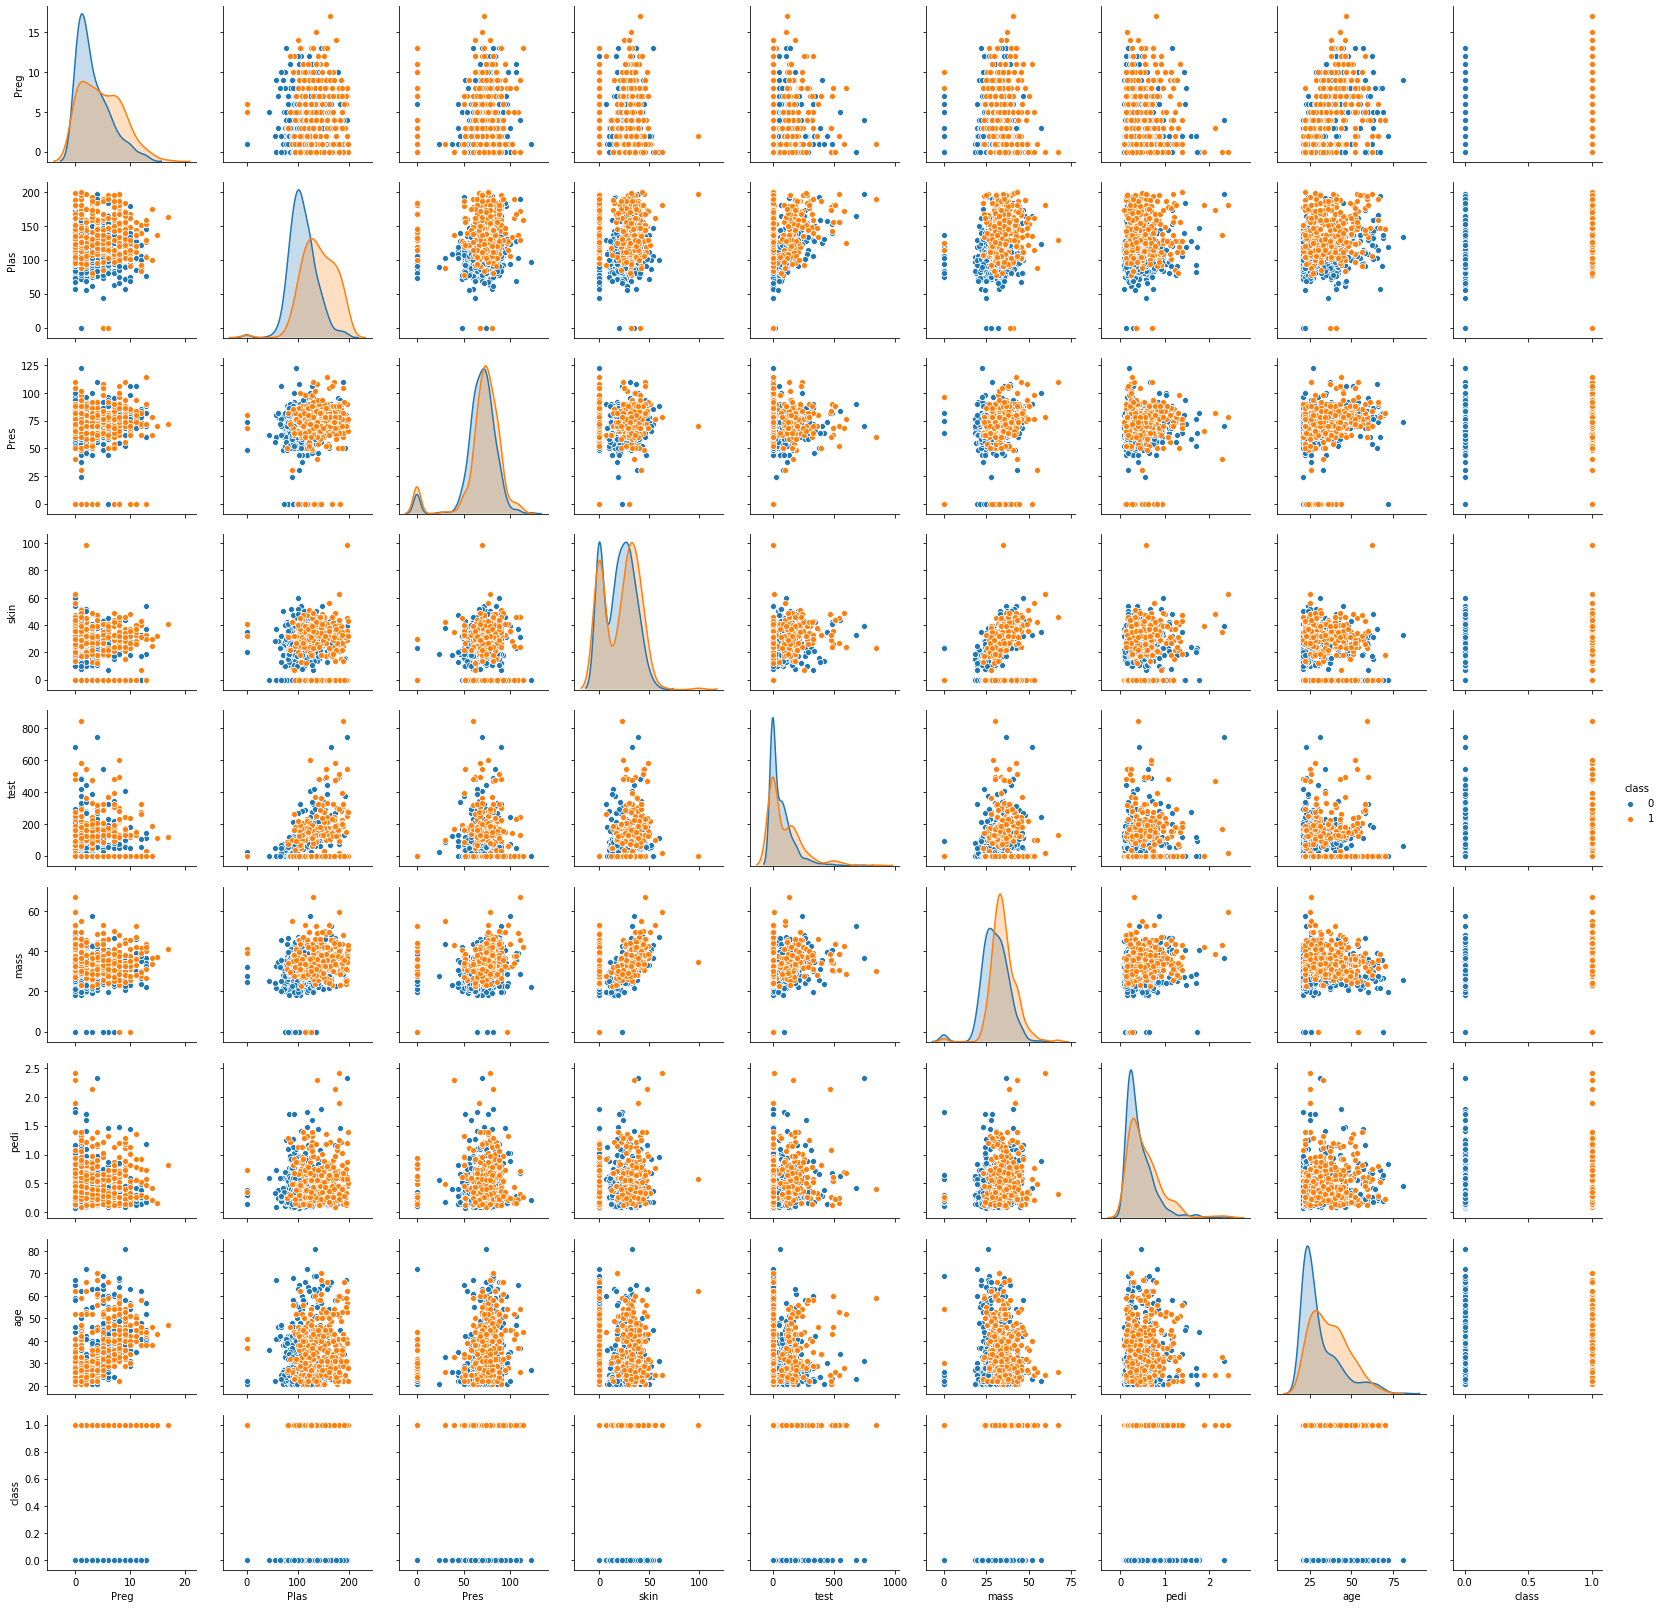

In [5]:
sns.pairplot(pima_df, hue='class')

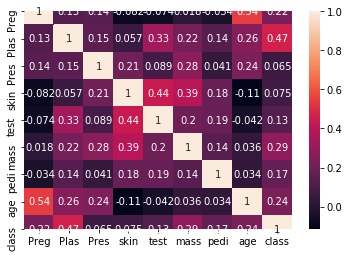

In [6]:
sns.heatmap(pima_df.corr(), annot=True)


In [8]:
X= pima_df.iloc[:,0:8]
y= pima_df.iloc[:,8]

In [9]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
from keras import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [12]:
diabetes_classifier = Sequential()
#First Hidden Layer
diabetes_classifier.add(Dense(5, activation='relu', kernel_initializer='random_normal', input_dim=8))
#Second  Hidden Layer
diabetes_classifier.add(Dense(5, activation='relu', kernel_initializer='random_normal'))
#Output Layer
diabetes_classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [14]:
diabetes_classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [15]:
diabetes_classifier.fit(X_train,y_train, batch_size=10, epochs=50)

Epoch 1/50
614/614 [==============================] - 0s 437us/step - loss: 0.6887 - accuracy: 0.6515
Epoch 2/50
614/614 [==============================] - 0s 97us/step - loss: 0.6745 - accuracy: 0.6645
Epoch 3/50
614/614 [==============================] - 0s 83us/step - loss: 0.6409 - accuracy: 0.6645
Epoch 4/50
614/614 [==============================] - 0s 93us/step - loss: 0.5884 - accuracy: 0.7036
Epoch 5/50
614/614 [==============================] - 0s 93us/step - loss: 0.5385 - accuracy: 0.7736
Epoch 6/50
614/614 [==============================] - 0s 83us/step - loss: 0.5031 - accuracy: 0.7801
Epoch 7/50
614/614 [==============================] - 0s 81us/step - loss: 0.4830 - accuracy: 0.7785
Epoch 8/50
614/614 [==============================] - 0s 83us/step - loss: 0.4685 - accuracy: 0.7752
Epoch 9/50
614/614 [==============================] - 0s 82us/step - loss: 0.4604 - accuracy: 0.7752
Epoch 10/50
614/614 [==============================] - 0s 83us/step - loss: 0.4562 - accur

In [16]:
y_pred=diabetes_classifier.predict(X_test)
y_pred =(y_pred>0.5)

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[82 10]
 [29 33]]
